# Data Wrangling Pipeline for Demo Data
"This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/jiangshan123/Capstone_TDI"

This notebook begins with a raw CSV data and ends with data ready for machine learning.

## Demo Data

* Demo Data can be found here: https://github.com/jiangshan123/Capstone_TDI/blob/master/data/user_data_rui_liu.csv

* Demo data is a CSV file with some anonymized user data. The data corresponds to customers who purchase hair care products. Each row is a user (with a corresponding user_id) and there are 88759 users. The table contains 109 columns, or features, where user_id is considered a feature.

* There is no transaction data, but we summarize customers' transaction history using lifetime total revenue (LTR). This is the column in the dataset with label "predicted_future_ltr_10yr". Also included are revenue (total revenue so far) and purchases (total number of orders so far).

* There are also user-profile questions that were provided via an online Quiz. The 109 columns include categorical data that has been one-hot-encoded. 

## Overview

* Setup: load packages/setup path
* Load Demo Data
* Deal with missing data
* Deal with string data using Labelencode
* Preliminary statistical data analysis
* Data Visualization
* Save cleaned Data

The important scientific code is imported from the [Capstone_TDI](https://github.com/jiangshan123/Capstone_TDI) project. Refer to Capstone_TDI for additional documentation and citation information.

### DEV
* V1: Update data saving
*     Update normlization 

## Setup

Import packages for I/O, visualization, and analysis.

In [51]:
%matplotlib inline

import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from ipywidgets import widgets

## Control runs here

In [3]:
del_NaN = True

## import dataset

In [6]:
filePath = r"/Users/Rui/Documents/Doc/Job/Data Incubator/Capstone/Project/data/"
fileName = filePath + r"user_data_rui_liu.csv"
savePath = r"/Users/Rui/Documents/Doc/Job/Data Incubator/Capstone/Project/results/"

In [7]:
df = pd.read_csv(fileName)

In [8]:
pd.set_option('max_columns',1000) 
pd.set_option('max_row',300) 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df.head(5)

,user_id,visit_count,avg_session_length,visitor_age,country,city,state,longitude,latitude,total_pages,pages_color-translator,pages_account,pages_colorbar,pages_shop,pages_welcome,pages_learn-more,pages_landing,pages_hair-dye-ingredients,pages_confirmation,pages_hair-color-chart,pages_shopping,pages_faqs,pages_hair-colorist,pages_how-to-color-your-hair,pages_other,pages_refer,pages_support,pages_color-advisor,pages_cart,pages_compare-shades,pages_notloggedin,pages_blog,pages_search,pages_hair-color,pages_checkout,pages_about,pages_product,pages_membership,pages_share,pages_signIn,pages_email-unsubscribe,device_desktop,device_mobile,device_tablet,browser_firefox,browser_chrome,browser_other,browser_ie,browser_facebook,browser_safari,utm_direct,utm_iterable,utm_other,utm_bronto,utm_facebook,utm_google,medium_cpc,medium_none,medium_other,medium_email,medium_organic,medium_fbigan,purchases,revenue,total_customer_type,customer_type_colorbar,customer_type_rootreboot,customer_type_other,customer_type_gloss,customer_type_color,total_order_type,order_type_one-time,order_type_subscription,order_type_renewal,predicted_future_ltr_10yr,"COLOR_WHERE_\at_salon\""""","COLOR_WHERE_\salon_and_home\""""","COLOR_WHERE_\at_home\""""","COMFORT_LEVEL_\somewhat_comfortable\""""","COMFORT_LEVEL_\very_comfortable\""""","COMFORT_LEVEL_\comfortable\""""","COMFORT_LEVEL_\not_comfortable\""""","DO_WITH_HAIR_\highlight_only\""""","DO_WITH_HAIR_\change\""""","DO_WITH_HAIR_\not_sure\""""","DO_WITH_HAIR_\touch_up\""""","DO_WITH_HAIR_\color_and_highlights\""""",FREQUENCY_7,FREQUENCY_3,FREQUENCY_8,FREQUENCY_5,FREQUENCY_other,FREQUENCY_6,FREQUENCY_4,FREQUENCY_12,FREQUENCY_2,"GRAY_LEVEL_\not_sure\""""","GRAY_LEVEL_\all\""""","GRAY_LEVEL_\more_than_50\""""","GRAY_LEVEL_\no_gray\""""","GRAY_LEVEL_\less_than_50\""""","HAIR_COLOR_\black\""""","HAIR_COLOR_\red\""""","HAIR_COLOR_\brown\""""","HAIR_COLOR_\blonde\""""","NATURAL_HAIR_COLOR_\black\""""","NATURAL_HAIR_COLOR_\red\""""","NATURAL_HAIR_COLOR_\brown\""""","NATURAL_HAIR_COLOR_\blonde\"""""
0,1002185,1,2.58333,3284.86667,United States,San Jose,California,-121.90520,37.34220,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.33333,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,13,381.30000,23.00000,0.00000,0.00000,0.00000,0.00000,1.00000,23.00000,0.08696,0.04348,0.86957,1458.99873,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,1002442,1,7.45000,38958.71667,United States,Vail,Colorado,-106.37420,39.64030,12.00000,0.00000,0.00000,0.00000,0.16667,0.00000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,0.00000,0.16667,0.00000,0.41667,0.00000,0.00000,0.08333,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,3,331.45000,4.00000,0.00000,0.00000,0.00000,0.00000,1.00000,4.00000,1.00000,0.00000,0.00000,589.00726,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,1004042,3,3.16111,158199.40000,United States,Ocean Springs,Mississippi,-88.75870,30.40070,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.09091,0.00000,0.09091,0.00000,

In [16]:
N_raws, N_columns = df.shape
print("number of features = %d" % N_columns)
print("number of costomers = %d" % N_raws)

number of features = 109
number of costomers = 88759


In [17]:
df.describe()

,user_id,visit_count,avg_session_length,visitor_age,longitude,latitude,total_pages,pages_color-translator,pages_account,pages_colorbar,pages_shop,pages_welcome,pages_learn-more,pages_landing,pages_hair-dye-ingredients,pages_confirmation,pages_hair-color-chart,pages_shopping,pages_faqs,pages_hair-colorist,pages_how-to-color-your-hair,pages_other,pages_refer,pages_support,pages_color-advisor,pages_cart,pages_compare-shades,pages_notloggedin,pages_blog,pages_search,pages_hair-color,pages_checkout,pages_about,pages_product,pages_membership,pages_share,pages_signIn,pages_email-unsubscribe,device_desktop,device_mobile,device_tablet,browser_firefox,browser_chrome,browser_other,browser_ie,browser_facebook,browser_safari,utm_direct,utm_iterable,utm_other,utm_bronto,utm_facebook,utm_google,medium_cpc,medium_none,medium_other,medium_email,medium_organic,medium_fbigan,purchases,revenue,total_customer_type,customer_type_colorbar,customer_type_rootreboot,customer_type_other,customer_type_gloss,customer_type_color,total_order_type,order_type_one-time,order_type_subscription,order_type_renewal,predicted_future_ltr_10yr,"COLOR_WHERE_\at_salon\""""","COLOR_WHERE_\salon_and_home\""""","COLOR_WHERE_\at_home\""""","COMFORT_LEVEL_\somewhat_comfortable\""""","COMFORT_LEVEL_\very_comfortable\""""","COMFORT_LEVEL_\comfortable\""""","COMFORT_LEVEL_\not_comfortable\""""","DO_WITH_HAIR_\highlight_only\""""","DO_WITH_HAIR_\change\""""","DO_WITH_HAIR_\not_sure\""""","DO_WITH_HAIR_\touch_up\""""","DO_WITH_HAIR_\color_and_highlights\""""",FREQUENCY_7,FREQUENCY_3,FREQUENCY_8,FREQUENCY_5,FREQUENCY_other,FREQUENCY_6,FREQUENCY_4,FREQUENCY_12,FREQUENCY_2,"GRAY_LEVEL_\not_sure\""""","GRAY_LEVEL_\all\""""","GRAY_LEVEL_\more_than_50\""""","GRAY_LEVEL_\no_gray\""""","GRAY_LEVEL_\less_than_50\""""","HAIR_COLOR_\black\""""","HAIR_COLOR_\red\""""","HAIR_COLOR_\brown\""""","HAIR_COLOR_\blonde\""""","NATURAL_HAIR_COLOR_\black\""""","NATURAL_HAIR_COLOR_\red\""""","NATURAL_HAIR_COLOR_\brown\""""","NATURAL_HAIR_COLOR_\blonde\"""""
count,88759.00000,88759.00000,88759.00000,88759.00000,88688.00000,88688.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,88759.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000,87284.00000
mean,1176084.99343,2.03228,3.73922,129591.45697,-92.48487,37.68682,12.21550,0.00107,0.01957,0.00802,0.13907,0.05317,0.00346,0.00169,0.00120,0.05592,0.00301,0.02733,0.00167,0.00103,0.00418,0.00766,0.00344,0.00703,0.09143,0.11899,0.02118,0.00201,0.01345,0.00354,0.00223,0.13431,0.00138,0.18921,0.00227,0.00261,0.07146,0.00742,0.37180,0.53282,0.09538,0.04012,0.28478,0.07603,0.04831,0.16155,0.38919,0.31459,0.17845,0.08763,0.04810,0.21292,0.15831,0.10080,0.31513,0.18638,0.23352,0.07622,0.08793,3.54468,108.39343,4.74884,0.00704,0.02381,0.01126,0.03669,0.92120,4.74884,0.42896,0.24715,0.32389,241.30806,0.23179,0.14275,0.37372,0.08409,0.11336,0.15342,0.01965,0.01767,0.37279,0.06863,0.29955,0.00791,0.05060,

In [22]:
df.dtypes

user_id                                     int64
visit_count                                 int64
avg_session_length                        float64
visitor_age                               float64
country                                    object
city                                       object
state                                      object
longitude                                 float64
latitude                                  float64
total_pages                               float64
pages_color-translator                    float64
pages_account                             float64
pages_colorbar                            float64
pages_shop                                float64
pages_welcome                             float64
pages_learn-more                          float64
pages_landing                             float64
pages_hair-dye-ingredients                float64
pages_confirmation                        float64
pages_hair-color-chart                    float64


In [34]:
feature_examples = ['pages_checkout', 'device_desktop', 'browser_chrome', 'utm_facebook', 'medium_email',
                    'order_type_one-time', r'COLOR_WHERE_\at_home\""', r'HAIR_COLOR_\black\""',
                    'predicted_future_ltr_10yr', 'purchases', 'revenue']

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


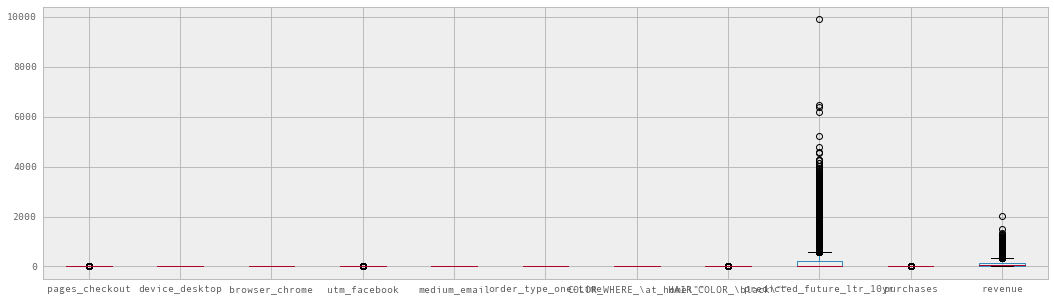

In [38]:
pd.options.display.mpl_style = 'default'
df[feature_examples].boxplot(figsize = (18,5))

In [71]:
def boxplots(data, features_per_raw = 10, save = True):
    N_imgs = m.ceil(N_columns/features_per_raw)
    for i in range(N_imgs):
        fig, ax = plt.figure(figsize = (8,6))
        df.iloc[:,features_per_raw*i:features_per_raw*(i+1)].boxplot(figsize = (18,5),rot=45)
        if save:
            plt.savefig(savePath + 'feature_analysis/boxplot_' + str(i+1))

In [72]:
boxplots(df, features_per_raw = 10, save = True)

TypeError: 'Figure' object is not iterable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35ee8b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a37b7ac18>]], dtype=object)

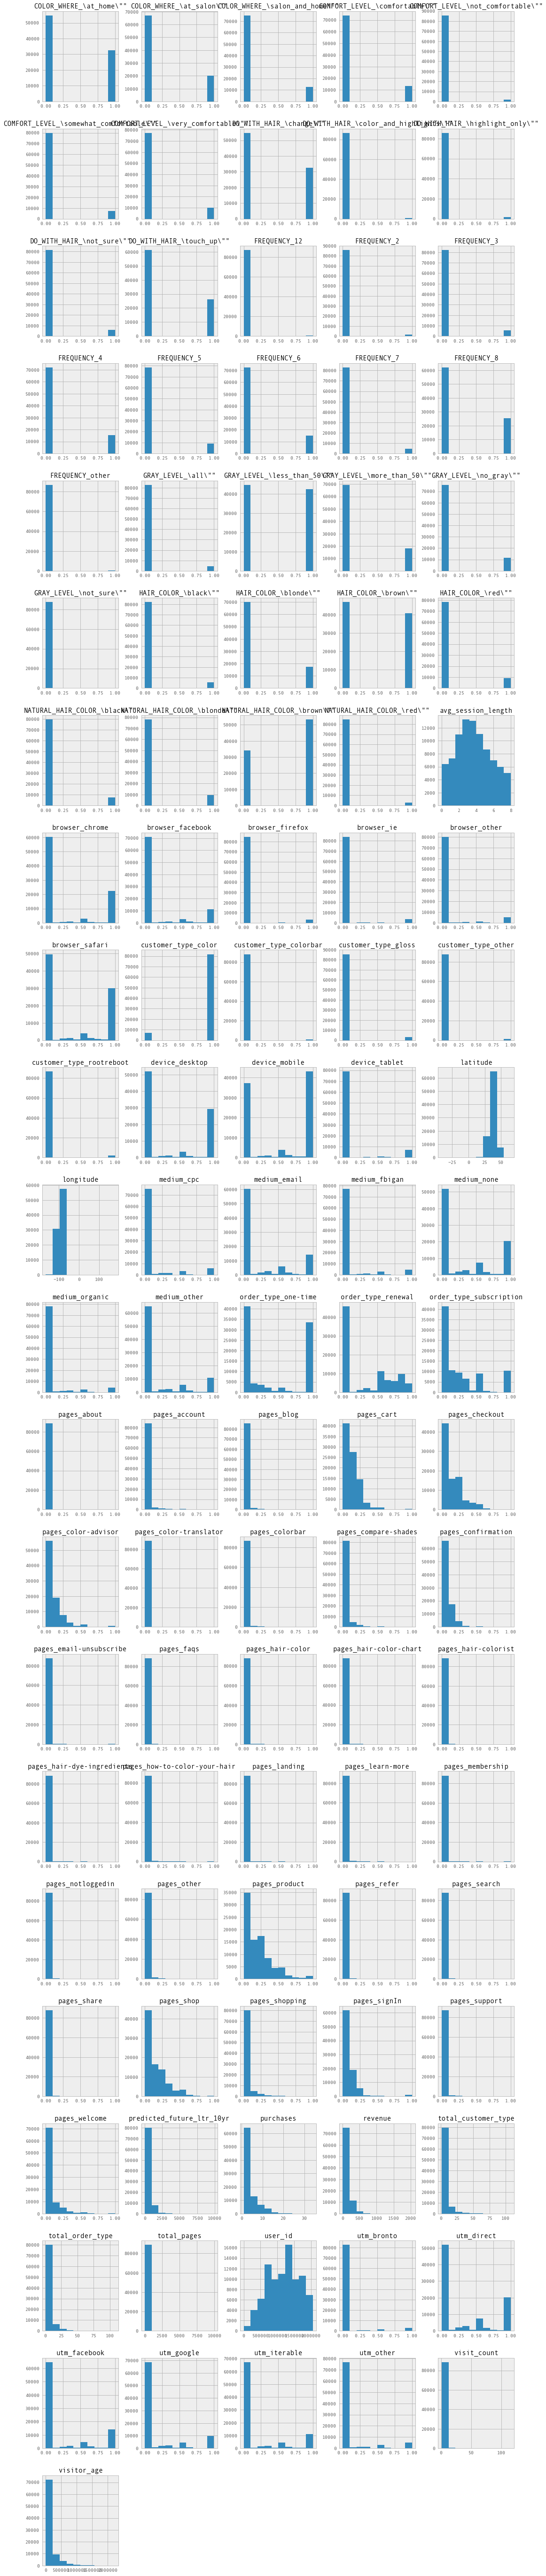

In [44]:
df.hist(figsize = (18,100),layout=(22,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a38e4b6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a39106320>]], dtype=object)

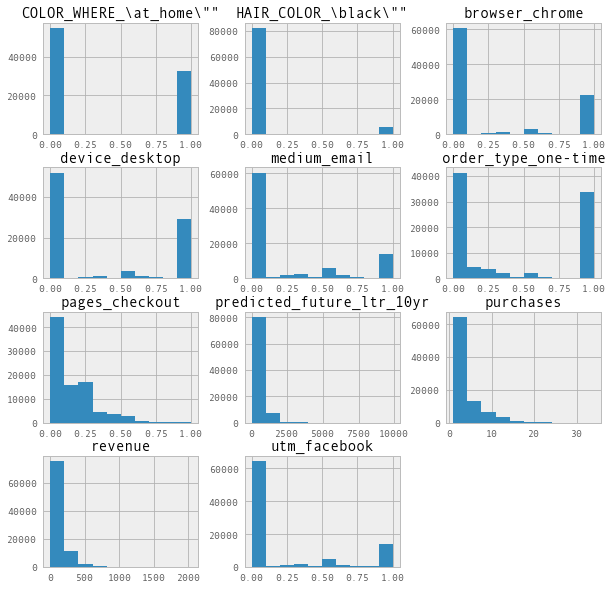

In [47]:
df.hist(column = feature_examples, figsize = (10,10))